In [1]:
from tensorflow import keras 
model_vgg16 = keras.applications.VGG16(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

58900480/58889256 [==============================] - 6s 0us/step


In [2]:
model_vgg16.trainable = False

In [4]:
inputs = keras.Input(shape=(224, 224, 3))
x_train = model_vgg16(inputs, training=False)
x_train = keras.layers.GlobalAveragePooling2D()(x_train)
expected_outputs = keras.layers.Dense(6, activation = 'softmax')(x_train)
model_trianed = keras.Model(inputs,expected_outputs)

In [5]:
model_trianed.compile(loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator_data = ImageDataGenerator(rotation_range=10, zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,
    vertical_flip=False)

In [7]:
training_set = generator_data.flow_from_directory(r'C:\Users\91738\OneDrive\Documents\SD_Project\archive\dataset\train',target_size=(224, 224), color_mode='rgb', class_mode="categorical")


Found 10901 images belonging to 6 classes.


In [ ]:
testing_set = generator_data.flow_from_directory(r'C:\Users\91738\OneDrive\Documents\SD_Project\archive\dataset\test',target_size=(224, 224), color_mode='rgb', class_mode="categorical")


In [9]:
# Change the epochs number if you have better ram and gpu
model_trianed.fit(training_set,steps_per_epoch=training_set.samples/training_set.batch_size,epochs=5)

Epoch 1/5
340/340 [==============================] - 1376s 4s/step - loss: 0.4242 - accuracy: 0.8759
Epoch 2/5
340/340 [==============================] - 1381s 4s/step - loss: 0.1556 - accuracy: 0.9500
Epoch 3/5
340/340 [==============================] - 1406s 4s/step - loss: 0.1020 - accuracy: 0.9665
Epoch 4/5
340/340 [==============================] - 1350s 4s/step - loss: 0.0788 - accuracy: 0.9725
Epoch 5/5
340/340 [==============================] - 1386s 4s/step - loss: 0.0642 - accuracy: 0.9791


In [ ]:
model_trianed.fit(testing_set,steps_per_epoch=testing_set.samples/testing_set.batch_size,epochs=1)
model_trained.pre

In [10]:
epoch = [1,2,3,4,5]
accuracy = [0.879,0.95,0.9665,0.9725,0.9791]
loss = [0.4242,0.1556,0.1020,0.0788,0.0642]


In [12]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

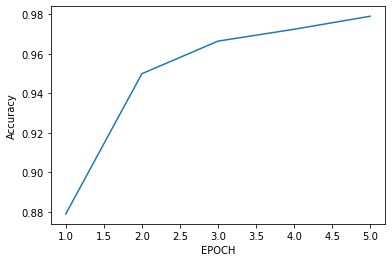

In [16]:
epoch = np.array(epoch)
accuracy = np.array(accuracy)

plt.plot(epoch, accuracy)
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.show()

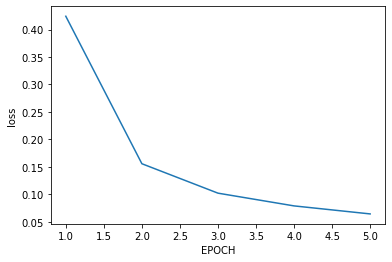

In [18]:
losses = np.array(loss)

plt.plot(epoch, losses)
plt.xlabel("EPOCH")
plt.ylabel("loss")
plt.show()